In [38]:
import torch
import torch.utils.data as tud
import torch.nn as nn
import pickle
from tqdm.notebook import tqdm
import datetime
import matplotlib.pyplot as plt
import importlib
import sys
import pandas as pd
import glob
from pathlib import Path
import numpy as np

In [39]:
!pwd

/home/mcosi153


In [40]:
!git clone https://github.com/jarobyte91/pytorch_beam_search.git

fatal: destination path 'pytorch_beam_search' already exists and is not an empty directory.


In [41]:
pip install git+https://github.com/jarobyte91/pytorch_beam_search.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/jarobyte91/pytorch_beam_search.git to /tmp/pip-req-build-hgmxnucq
  Running command git clone --filter=blob:none --quiet https://github.com/jarobyte91/pytorch_beam_search.git /tmp/pip-req-build-hgmxnucq
  Resolved https://github.com/jarobyte91/pytorch_beam_search.git to commit 4f6c55d51556d731f3fff49d6032fe417de63c3f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 23.0 -> 23.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
sys.path.append("/home/mcosi153/guemes/lib")

In [43]:
!pip show pytorch_beam_search

Name: pytorch-beam-search
Version: 1.2.2
Summary: A simple library that implements search algorithms for sequence models written in PyTorch.
Home-page: https://github.com/jarobyte91/pytorch_beam_search
Author: Juan Ramirez-Orta
Author-email: jarobyte91@gmail.com
License: 
Location: /home/mcosi153/.local/lib/python3.9/site-packages
Requires: certifi, nltk, numpy, pandas, python-dateutil, pytz, six, torch, tqdm, typing-extensions
Required-by: post-ocr-correction


In [44]:
#from pytorch_decoding.seq2seq import Transformer
from pytorch_beam_search.seq2seq import Transformer, beam_search

In [45]:
#scratch = "/home/jarobyte/scratch/guemes/icdar/en/"
scratch = "./post_ocr_correction/data/en/"

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [47]:
char2i = pickle.load(open(scratch + "data/char2i_new_pages.pkl", "rb"))

In [48]:
i2char = pickle.load(open(scratch + "data/i2char_new_pages.pkl", "rb"))

# data

In [49]:
train_size = 1000000

dev_size = 1000000

# train_size = 1000

# dev_size = 100

## train

In [50]:
train_source = torch.load(scratch + "data/train_source_new_pages.pt")[:train_size].to(device)#add to custom data
train_source.shape

torch.Size([9011, 80])

In [51]:
train_target = torch.load(scratch + "data/train_target_new_pages.pt")[:train_size].to(device)
train_target.shape

torch.Size([9011, 80])

In [52]:
dev_source = torch.load(scratch + "data/dev_source_new_pages.pt")[:dev_size].to(device)
dev_source.shape

torch.Size([635, 102])

In [53]:
dev_target = torch.load(scratch + "data/dev_target_new_pages.pt")[:dev_size].to(device)
dev_target.shape

torch.Size([635, 102])

In [35]:
#train_source[0]

In [36]:
# source_files = glob.glob(scratch + "data/train_source_new0*.pt")
# target_files = glob.glob(scratch + "data/train_target_new0*.pt")
# source_files.sort()
# target_files.sort()
# source_files = source_files
# target_files = target_files
# file_number = 0
# train_source = torch.load(source_files[file_number])[:train_size].to(device)
# train_target = torch.load(target_files[file_number])[:train_size].to(device)


In [37]:
#train_source.shape

NameError: name 'train_source' is not defined

In [ ]:
#train_source.shape

In [ ]:
#train_target.shape

In [ ]:
# train_target = torch.load(scratch + "data/train_target_new.pt")[:train_size].to(device)#
# train_target.shape

In [17]:
# dev_source = torch.load(scratch + "data/dev_source_new_full.pt")[:dev_size].to(device)
# dev_source.shape

torch.Size([635, 102])

In [18]:
# dev_target = torch.load(scratch + "data/dev_target_new_full.pt")[:dev_size].to(device)
# dev_target.shape

torch.Size([635, 102])

In [ ]:
# import os
# import pandas as pd
# from torchvision.io import read_image

# class CustomImageDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

In [15]:
import time


In [27]:
class YourDataset(torch.utils.data.Dataset):
    def __init__(self) -> None:
        #self.source = torch.load(scratch + "data/train_source_new.pt")[:train_size].to(device)
       # self.target = torch.load(scratch + "data/train_target_new.pt")[:train_size].to(device)

        source_files = glob.glob(scratch + "data/train_source_new0*.pt")
        target_files = glob.glob(scratch + "data/train_target_new0*.pt")
        source_files.sort()
        target_files.sort()
        self.source_files = source_files
        self.target_files = target_files
        #self.file_number = 
        self.file_tracker = []
        self.file_lengths = []
        for s in source_files:
            #print(s)
            y = torch.load(s).to(device)
            self.file_lengths.append(len(y))
        print(self.file_lengths)
        
        #self.source = torch.load(source_files[self.file_number])[:train_size].to(device)
        #self.target = torch.load(target_files[self.file_number])[:train_size].to(device)
        #self.file_length = len(self.source)
        #print(self.file_length)
#idx is the batch index
    def __getitem__(self, idx) -> torch.Tensor:
        while True:
            index = np.random.randint(len(self.source_files))
            item_index = np.random.randint(self.file_lengths[index])
            if (index, item_index) not in self.file_tracker:
                self.file_tracker.append((index, item_index))
                break
        source_sample = torch.load(self.source_files[index])[item_index].to(device)
        target_sample = torch.load(self.target_files[index])[item_index].to(device)

        return source_sample, target_sample
#     def __getitem__(self, idx) -> torch.Tensor:
#         index = np.random.randint(len(self.source_files))
#         item_index = np.random.randint(self.file_lengths[index])
#         #print(index)
#         #print(item_index)
#         index_save = index
#         item_index_save = item_index
#         while [index_save, item_index_save] not in self.file_tracker:
#             index_save = index
#             item_index_save = item_index
#             #print(index)
#             #print(item_index)
#             self.file_tracker.append([index_save, item_index_save])
#             print(time.ctime())
#             source_sample = torch.load(self.source_files[index_save])[item_index_save].to(device)
#             target_sample = torch.load(self.target_files[index_save])[item_index_save].to(device)
#             print(time.ctime())
#             index = np.random.randint(len(self.source_files))
#             item_index = np.random.randint(self.file_lengths[index])
            
# #         if idx < self.file_length -1:
# #             # load one sample by index, e.g like this:
# #             source_sample = self.source[idx]
# #             target_sample = self.target[idx]
# #         else:
# #             self.file_number += 1
# #             self.source = torch.load(source_files[self.file_number])[:train_size].to(device)
# #             self.target = torch.load(target_files[self.file_number])[:train_size].to(device)
# #             self.file_length = len(self.source)
# #             source_sample = self.source[idx]
# #             target_sample = self.target[idx]
# #             print("here")

#             #pd.len() 

#         # do some preprocessing, convert to tensor and what not

#         return source_sample, target_sample

    def __len__(self):
        return sum(self.file_lengths)
        #return train_size
        #return len(self.source)

In [28]:
yourDataset = YourDataset()
train_loader = torch.utils.data.DataLoader(yourDataset, batch_size= 32, num_workers=0, shuffle=False) #pin_memory=True works if data is loaded on the cpu first, and then pushed to gpu
#from pin_memory RuntimeError: cannot pin 'torch.cuda.LongTensor' only dense CPU tensors can be pinned

[999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999130, 999131, 999131, 999130, 999131, 999130, 999130, 999130, 999131, 999130, 999131, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999131, 999130, 999130, 999130, 999130, 999131, 999131, 999130, 999130, 999130, 999130]


In [20]:
len(train_loader)

2872500

In [72]:
# print(time.ctime())
# for i, (target, source) in enumerate(train_loader):
#     if i%10 == 0:
#         print(i)
#         print(target)
#         print(time.ctime())

In [54]:
import torch
import torch.nn as nn
import torch.utils.data as tud
from timeit import default_timer as timer
from tqdm.auto import tqdm
import pandas as pd
import warnings


class Seq2Seq(nn.Module): 
    """
    A generic sequence-to-sequence model. All other sequence-to-sequence models should extend this class 
    with a __init__ and forward methods, in the same way as in normal PyTorch.
    """
    def print_architecture(self):
        """
        Displays the information about the model in standard output. 
        """
        for k in self.architecture.keys():
            print(f"{k.replace('_', ' ').capitalize()}: {self.architecture[k]}")
        print(f"Trainable parameters: {sum([p.numel() for p in self.parameters()]):,}")
        print()

    def fit(self,#train_loader, 
            X_train, 
            Y_train, 
            X_dev = None, 
            Y_dev = None, 
            batch_size = 100, 
            epochs = 5, 
            learning_rate = 10**-4, 
            weight_decay = 0, 
            progress_bar = 0, 
            save_path = None):
        print("fit begins")
        best_dev_loss=float('inf')
        best_epoch=float('inf')
        """
        A generic training method with Adam and Cross Entropy.

        Parameters
        ----------    
        X_train: LongTensor of shape (train_examples, train_input_length)
            The input sequences of the training set.
            
        Y_train: LongTensor of shape (train_examples, train_output_length)
            The output sequences of the training set.
            
        X_dev: LongTensor of shape (dev_examples, dev_input_length), optional
            The input sequences for the development set.
            
        Y_train: LongTensor of shape (dev_examples, dev_output_length), optional
            The output sequences for the development set.
            
        batch_size: int
            The number of examples to process in each batch.

        epochs: int
            The number of epochs of the training process.
            
        learning_rate: float
            The learning rate to use with Adam in the training process. 
            
        weight_decay: float
            The weight_decay parameter of Adam (L2 penalty), useful for regularizing models. For a deeper 
            documentation, go to https://pytorch.org/docs/stable/_modules/torch/optim/adam.html#Adam            

        progress_bar: int
            Shows a tqdm progress bar, useful for tracking progress with large tensors.
            If equal to 0, no progress bar is shown. 
            If equal to 1, shows a bar with one step for every epoch.
            If equal to 2, shows the bar when equal to 1 and also shows a bar with one step per batch for every epoch.
            If equal to 3, shows the bars when equal to 2 and also shows a bar to track the progress of the evaluation
            in the development set.
            
        save_path: string, optional
            Path to save the .pt file containing the model parameters when the training ends.

        Returns
        -------
        performance: Pandas DataFrame
            DataFrame with the following columns: epoch, train_loss, train_error_rate, (optionally dev_loss and 
            dev_error_rate), minutes, learning_rate, weight_decay, model, encoder_embedding_dimension, 
            decoder_embedding_dimension, encoder_hidden_units, encoder_layers, decoder_hidden_units, decoder_layers, 
            dropout, parameters and one row for each of the epochs, containing information about the training process.
        """
        assert X_train.shape[0] == Y_train.shape[0]
        assert (X_dev is None and Y_dev is None) or (X_dev is not None and Y_dev is not None) 
        if (X_dev is not None and Y_dev is not None):
            assert X_dev.shape[0] == Y_dev.shape[0]
            dev = True
        else:
            dev = False
            

        train_dataset = tud.TensorDataset(X_train, Y_train)
        train_loader = tud.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)# make own class data loader to read in batches at a time
#         class YourDataset(torch.utils.data.Dataset):
#             def __init__(self) -> None:
#                 #self.source = torch.load(scratch + "data/train_source_new.pt")[:train_size].to(device)
#                # self.target = torch.load(scratch + "data/train_target_new.pt")[:train_size].to(device)
                
#                 source_files = glob.glob(scratch + "data/train_source_new0*.pt")
#                 target_files = glob.glob(scratch + "data/train_target_new0*.pt")
#                 source_files.sort()
#                 target_files.sort()
#                 self.source_files = source_files
#                 self.target_files = target_files
#                 self.file_number = 0
#                 self.source = torch.load(source_files[self.file_number])[:train_size].to(device)
#                 self.target = torch.load(target_files[self.file_number])[:train_size].to(device)
#                 self.file_length = len(self.source)
                
#             def __getitem__(self, idx) -> torch.Tensor:
#                 if idx < self.file_length:
#                     # load one sample by index, e.g like this:
#                     source_sample = self.source[idx]
#                     target_sample = self.target[idx]
#                 else:
#                     self.file_number += 1
#                     self.source = torch.load(source_files[self.file_number])[:train_size].to(device)
#                     self.target = torch.load(target_files[self.file_number])[:train_size].to(device)
#                     self.file_length = len(self.source)
#                     source_sample = self.source[idx]
#                     target_sample = self.target[idx]
            
                    
#                     #pd.len() 

#                 # do some preprocessing, convert to tensor and what not

#                 return source_sample, target_sample

#             def __len__(self):
#                 return len(self.source)
        #creating dataloader
        #yourDataset = YourDataset()
        #train_loader = torch.utils.data.DataLoader(yourDataset, batch_size= batch_size, num_workers=0, shuffle=True)
    
        criterion = nn.CrossEntropyLoss(ignore_index = 0)
        optimizer = torch.optim.Adam(self.parameters(), lr = learning_rate, weight_decay = weight_decay)
        performance = []
        start = timer()
        epochs_iterator = range(1, epochs + 1)
        if progress_bar > 0:
            epochs_iterator = tqdm(epochs_iterator)
            print("Training started")
        print("X_train.shape:", X_train.shape)
        print("Y_train.shape:", Y_train.shape)
        if dev:
            print("X_dev.shape:", X_dev.shape)
            print("Y_dev.shape:", Y_dev.shape)
        print(f"Epochs: {epochs:,}\nLearning rate: {learning_rate}\nWeight decay: {weight_decay}")
        header_1 = "Epoch | Train                "
        header_2 = "      | Loss     | Error Rate"
        rule = "-" * 29
        if dev:
            header_1 += " | Development          "
            header_2 += " | Loss     | Error Rate"
            rule += "-" * 24
        header_1 += " | Minutes"
        header_2 += " |"
        rule += "-" * 10
        print(header_1, header_2, rule, sep = "\n")
        for e in epochs_iterator:
            self.train()
            losses = []
            errors = []
            sizes = []
            train_iterator = train_loader
            if progress_bar > 1:
                train_iterator = tqdm(train_iterator)
            for x, y in train_iterator:
                # compute loss and backpropagate
                probabilities = self.forward(x, y).transpose(1, 2)[:, :, :-1]
                y = y[:, 1:]
                loss = criterion(probabilities, y)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                # compute accuracy
                predictions = probabilities.argmax(1)
                batch_errors = (predictions != y)
                # append the results
                losses.append(loss.item())
                errors.append(batch_errors.sum().item())
                sizes.append(batch_errors.numel())
            train_loss = sum(losses) / len(losses)
            train_error_rate = 100 * sum(errors) / sum(sizes)
            t = (timer() - start) / 60
            status_string = f"{e:>5} | {train_loss:>8.4f} | {train_error_rate:>10.3f}"
            status = {"epoch":e,
                      "train_loss": train_loss,
                      "train_error_rate": train_error_rate}
            if dev:
                dev_loss, dev_error_rate = self.evaluate(X_dev, 
                                                         Y_dev, 
                                                         batch_size = batch_size, 
                                                         progress_bar = progress_bar > 2, 
                                                         criterion = criterion)
                status_string += f" | {dev_loss:>8.4f} | {dev_error_rate:>10.3f}"
                status.update({"dev_loss": dev_loss, "dev_error_rate": dev_error_rate})
            status.update({"training_minutes": t,
                           "learning_rate": learning_rate,
                           "weight_decay": weight_decay})
            performance.append(status)
            if save_path is not None: 
                print("dev =", dev)
                print("e =", e)
                print("dev loss =", dev_loss)
                print("best dev loss =", best_dev_loss)
                #if (not dev) or (e < 2) or (dev_loss < min([p["dev_loss"] for p in performance[:-1]])):
                if (not dev) or (e < 2) or (dev_loss < best_dev_loss):
                    torch.save(self.state_dict(), save_path)
                    print(status)
                    best_dev_loss = dev_loss
                    print("save path =", save_path)
            status_string += f" | {t:>7.1f}"
            print(status_string)
        print()
        return pd.concat((pd.DataFrame(performance), 
                          pd.DataFrame([self.architecture for i in performance])), axis = 1)\
               .drop(columns = ["source_index", "target_index"])
    
            
    def evaluate(self, 
                 X, 
                 Y, 
                 criterion = nn.CrossEntropyLoss(), 
                 batch_size = 128, 
                 progress_bar = False):
        """
        Evaluates the model on a dataset.
        
        Parameters
        ----------
        X: LongTensor of shape (examples, input_length)
            The input sequences of the dataset.
            
        Y: LongTensor of shape (examples, output_length)
            The output sequences of the dataset.
            
        criterion: PyTorch module
            The loss function to evalue the model on the dataset, has to be able to compare self.forward(X, Y) and Y
            to produce a real number.
            
        batch_size: int
            The batch size of the evaluation loop.
            
        progress_bar: bool
            Shows a tqdm progress bar, useful for tracking progress with large tensors.
            
        Returns
        -------
        loss: float
            The average of criterion across the whole dataset.
            
        error_rate: float
            The step-by-step accuracy of the model across the whole dataset. Useful as a sanity check, as it should
            go to zero as the loss goes to zero.
            
        """
        dataset = tud.TensorDataset(X, Y)
        loader = tud.DataLoader(dataset, batch_size = batch_size)
        self.eval()
        losses = []
        errors = []
        sizes = []
        with torch.no_grad():
            iterator = iter(loader)
            if progress_bar:
                iterator = tqdm(iterator)
            for batch in iterator:
                x, y = batch
                # compute loss
                probabilities = self.forward(x, y).transpose(1, 2)[:, :, :-1]
                y = y[:, 1:]
                loss = criterion(probabilities, y)
                # compute accuracy
                predictions = probabilities.argmax(1)
                batch_errors = (predictions != y)
                # append the results
                losses.append(loss.item())
                errors.append(batch_errors.sum().item())
                sizes.append(batch_errors.numel())
            loss = sum(losses) / len(losses)
            error_rate = 100 * sum(errors) / sum(sizes)
        return loss, error_rate 
    
class LSTM(Seq2Seq):
    def __init__(self, 
                 source_index, 
                 target_index, 
                 encoder_embedding_dimension = 32,
                 decoder_embedding_dimension = 32,
                 encoder_hidden_units = 128, 
                 encoder_layers = 2,
                 decoder_hidden_units = 128,
                 decoder_layers = 2,
                 dropout = 0.0):
        """
        A standard Seq2Seq LSTM model as in 'Learning Phrase Representations using RNN Encoder-Decoder 
        for Statistical Machine Translation' by Cho et al. (2014). 
        
        Parameters
        ----------
        in_vocabulary: dictionary
            Vocabulary with the index:token pairs for the inputs of the model.
            
        out_vocabulary: dictionary
            Vocabulary with the token:index pairs for the outputs of the model.
            
        encoder_embedding_dimension: int
            Dimension of the embeddings to feed into the encoder.
            
        decoder_embedding_dimension: int
            Dimension of the embeddings to feed into the decoder.
            
        encoder_hidden_units: int
            Hidden size of the encoder.
            
        encoder_layers: int
            Hidden layers of the encoder.
            
        decoder_hidden_units: int
            Hidden units of the decoder.
            
        decoder_layers: int
            Hidden layers of the decoder.
            
        dropout: float between 0.0 and 1.0
            Dropout rate to apply to whole model.
        """
        self.source_index = source_index
        self.target_index = target_index
        super().__init__()
        self.source_embeddings = nn.Embedding(len(source_index), encoder_embedding_dimension)
        self.target_embeddings = nn.Embedding(len(target_index), decoder_embedding_dimension)
        self.encoder_rnn = nn.LSTM(input_size = encoder_embedding_dimension, 
                                   hidden_size = encoder_hidden_units, 
                                   num_layers = encoder_layers,
                                   dropout = dropout)
        self.decoder_rnn = nn.LSTM(input_size = encoder_layers * encoder_hidden_units + decoder_embedding_dimension, 
                                   hidden_size = decoder_hidden_units, 
                                   num_layers = decoder_layers,
                                   dropout = dropout)
        self.output_layer = nn.Linear(decoder_hidden_units, len(target_index))
        self.architecture = dict(model = "Seq2Seq LSTM",
                                 source_index = source_index, 
                                 target_index = target_index, 
                                 encoder_embedding_dimension = encoder_embedding_dimension,
                                 decoder_embedding_dimension = decoder_embedding_dimension,
                                 encoder_hidden_units = encoder_hidden_units, 
                                 encoder_layers = encoder_layers,
                                 decoder_hidden_units = decoder_hidden_units,
                                 decoder_layers = decoder_layers,
                                 dropout = dropout)
        self.print_architecture()
        
    def forward(self, X, Y):
        """
        Forward method of the model.
        
        Parameters
        ----------
        X: LongTensor of shape (batch_size, input_length)
            Tensor of integers containing the inputs for the model.
            
        Y: LongTensor of shape (batch_size, output_length)
            Tensor of integers containing the output produced so far.
            
        Returns
        -------
        output: FloatTensor of shape (batch_size, output_length, len(out_vocabulary))
            Tensor of floats containing the inputs for the final Softmax layer (usually integrated into the loss function).
        """
        X = self.source_embeddings(X.T)
        encoder, (encoder_last_hidden, encoder_last_memory) = self.encoder_rnn(X)
        encoder_last_hidden = encoder_last_hidden.transpose(0, 1).flatten(start_dim = 1)
        encoder_last_hidden = encoder_last_hidden.repeat((Y.shape[1], 1, 1))
        Y = self.target_embeddings(Y.T)
        Y = torch.cat((Y, encoder_last_hidden), axis = -1)
        decoder, (decoder_last_hidden, decoder_last_memory) = self.decoder_rnn(Y)
        output = self.output_layer(decoder.transpose(0, 1))
        return output        
    
    
class ReversingLSTM(Seq2Seq):
    def __init__(self, 
                 source_index, 
                 target_index, 
                 encoder_embedding_dimension = 32,
                 decoder_embedding_dimension = 32,
                 encoder_hidden_units = 128, 
                 encoder_layers = 2,
                 decoder_hidden_units = 128,
                 decoder_layers = 2,
                 dropout = 0.0):
        """
        A standard Seq2Seq LSTM model that reverses the order of the input as in 
        'Sequence to sequence learning with Neural Networks' by Sutskever et al. (2014). 
        
        Parameters
        ----------
        in_vocabulary: dictionary
            Vocabulary with the index:token pairs for the inputs of the model.
            
        out_vocabulary: dictionary
            Vocabulary with the token:index pairs for the outputs of the model.
            
        encoder_embedding_dimension: int
            Dimension of the embeddings to feed into the encoder.
            
        decoder_embedding_dimension: int
            Dimension of the embeddings to feed into the decoder.
            
        encoder_hidden_units: int
            Hidden size of the encoder.
            
        encoder_layers: int
            Hidden layers of the encoder.
            
        decoder_hidden_units: int
            Hidden units of the decoder.
            
        decoder_layers: int
            Hidden layers of the decoder.
            
        dropout: float between 0.0 and 1.0
            Dropout rate to apply to whole model.
        """
        super().__init__()
        self.source_index = source_index
        self.target_index = target_index
        self.source_embeddings = nn.Embedding(len(source_index), encoder_embedding_dimension)
        self.target_embeddings = nn.Embedding(len(target_index), decoder_embedding_dimension)
        self.encoder_rnn = nn.LSTM(input_size = encoder_embedding_dimension, 
                                   hidden_size = encoder_hidden_units, 
                                   num_layers = encoder_layers,
                                   dropout = dropout)
        self.decoder_rnn = nn.LSTM(input_size = decoder_embedding_dimension, 
                                   hidden_size = decoder_hidden_units, 
                                   num_layers = decoder_layers,
                                   dropout = dropout)
        self.output_layer = nn.Linear(decoder_hidden_units, len(target_index))
        self.enc2dec = nn.Linear(encoder_hidden_units * encoder_layers, decoder_hidden_units * decoder_layers)
        self.architecture = dict(model = "Seq2Seq Reversing LSTM",
                                 source_index = source_index, 
                                 target_index = target_index, 
                                 encoder_embedding_dimension = encoder_embedding_dimension,
                                 decoder_embedding_dimension = decoder_embedding_dimension,
                                 encoder_hidden_units = encoder_hidden_units, 
                                 encoder_layers = encoder_layers,
                                 decoder_hidden_units = decoder_hidden_units,
                                 decoder_layers = decoder_layers,
                                 dropout = dropout)
        self.print_architecture()
        
    def forward(self, X, Y):
        """
        Forward method of the model.
        
        Parameters
        ----------
        X: LongTensor of shape (batch_size, input_length)
            Tensor of integers containing the inputs for the model.
            
        Y: LongTensor of shape (batch_size, output_length)
            Tensor of integers containing the output produced so far.
            
        Returns
        -------
        output: FloatTensor of shape (batch_size, output_length, len(out_vocabulary))
            Tensor of floats containing the inputs for the final Softmax layer (usually integrated into the loss function).
        """
        X = self.source_embeddings(torch.flip(X.T, dims = (1, )))
        encoder, (encoder_last_hidden, encoder_last_memory) = self.encoder_rnn(X)
        encoder_last_hidden = encoder_last_hidden.transpose(0, 1).flatten(start_dim = 1)
        enc2dec = self.enc2dec(encoder_last_hidden)\
        .reshape(-1, self.decoder_rnn.num_layers, self.decoder_rnn.hidden_size)\
        .transpose(0, 1)\
        .contiguous()
        Y = self.target_embeddings(Y.T)
        decoder, (decoder_last_hidden, decoder_last_memory) = self.decoder_rnn(Y, (enc2dec, torch.zeros_like(enc2dec)))
        output = self.output_layer(decoder.transpose(0, 1))
        return output
    
    
class Transformer(Seq2Seq):
    def __init__(self, 
                 source_index, 
                 target_index,
                 max_sequence_length = 32,
                 embedding_dimension = 32,
                 feedforward_dimension = 128,
                 encoder_layers = 2,
                 decoder_layers = 2,
                 attention_heads = 2,
                 activation = "relu",
                 dropout = 0.0):
        """
        The standard PyTorch implementation of a Transformer model.
        
        Parameters
        ----------
        in_vocabulary: dictionary
            Vocabulary with the index:token pairs for the inputs of the model.
            
        out_vocabulary: dictionary
            Vocabulary with the token:index pairs for the outputs of the model.
            
        max_sequence_length: int
            Maximum sequence length accepted by the model, both for the encoder and the decoder.
            
        embedding_dimension: int
            Dimension of the embeddings of the model.
            
        feedforward_dimension: int
            Dimension of the feedforward network inside the self-attention layers of the model.
            
        encoder_layers: int
            Hidden layers of the encoder.
            
        decoder_layers: int
            Hidden layers of the decoder.
            
        attention_heads: int
            Attention heads inside every self-attention layer of the model.
            
        activation: string
            Activation function of the feedforward network inside the self-attention layers of the model. Can
            be either 'relu' or 'gelu'.
            
        dropout: float between 0.0 and 1.0
            Dropout rate to apply to whole model.
        """
        super().__init__()
        self.source_index = source_index
        self.target_index = target_index
        self.source_embeddings = nn.Embedding(len(source_index), embedding_dimension)
        self.target_embeddings = nn.Embedding(len(target_index), embedding_dimension)
        self.positional_embeddings = nn.Embedding(max_sequence_length, embedding_dimension)
        self.transformer = nn.Transformer(d_model = embedding_dimension, 
                                          dim_feedforward = feedforward_dimension,
                                          nhead = attention_heads, 
                                          num_encoder_layers = encoder_layers, 
                                          num_decoder_layers = decoder_layers,
                                          activation = activation,
                                          dropout = dropout)
        self.output_layer = nn.Linear(embedding_dimension, len(target_index))
        self.architecture = dict(model = "Seq2Seq Transformer",
                                 source_index = source_index,
                                 target_index = target_index,
                                 max_sequence_length = max_sequence_length,
                                 embedding_dimension = embedding_dimension,
                                 feedforward_dimension = feedforward_dimension,
                                 encoder_layers = encoder_layers,
                                 decoder_layers = decoder_layers,
                                 attention_heads = attention_heads,
                                 activation = activation,
                                 dropout = dropout)
        self.print_architecture()
        
    def forward(self, X, Y):
        """
        Forward method of the model.
        
        Parameters
        ----------
        X: LongTensor of shape (batch_size, input_length)
            Tensor of integers containing the inputs for the model.
            
        Y: LongTensor of shape (batch_size, output_length)
            Tensor of integers containing the output produced so far.
            
        Returns
        -------
        output: FloatTensor of shape (batch_size, output_length, len(out_vocabulary))
            Tensor of floats containing the inputs for the final Softmax layer (usually integrated in the loss function).
        """
        assert X.shape[1] <= self.architecture["max_sequence_length"]
        assert Y.shape[1] <= self.architecture["max_sequence_length"]
        X = self.source_embeddings(X)
        X_positional = torch.arange(X.shape[1], device = X.device).repeat((X.shape[0], 1))
        X_positional = self.positional_embeddings(X_positional)
        X = (X + X_positional).transpose(0, 1)
        Y = self.target_embeddings(Y)
        Y_positional = torch.arange(Y.shape[1], device = Y.device).repeat((Y.shape[0], 1))
        Y_positional = self.positional_embeddings(Y_positional)
        Y = (Y + Y_positional).transpose(0, 1)
        mask = self.transformer.generate_square_subsequent_mask(Y.shape[0]).to(Y.device)
        transformer_output = self.transformer.forward(src = X,
                                                      tgt = Y, 
                                                      tgt_mask = mask)
        transformer_output = transformer_output.transpose(0, 1)
        return self.output_layer(transformer_output)

In [ ]:
train

# model

In [55]:
model = Transformer(char2i, 
                    i2char, 
                    max_sequence_length = 110,
                    embedding_dimension = 512, #256,
                    feedforward_dimension = 2048, #1024,
                    attention_heads = 8,
                    encoder_layers = 4,
                    decoder_layers = 4)
                   #dropout = .5)
print("model created")
model.to(device)

log = model.fit(train_source, 
                train_target,
                #train_loader,
                dev_source, 
                dev_target, 
                epochs = 3, 
                progress_bar = 2, 
                learning_rate = 10**-4,
                save_path = "new_torch_file_new_pages8.pt")
print("model.fit completed")

Model: Seq2Seq Transformer
Source index: {'\t': 3, '\n': 4, ' ': 5, '!': 6, '"': 7, '#': 8, '$': 9, '%': 10, '&': 11, "'": 12, '(': 13, ')': 14, '*': 15, '+': 16, ',': 17, '-': 18, '.': 19, '/': 20, '0': 21, '1': 22, '2': 23, '3': 24, '4': 25, '5': 26, '6': 27, '7': 28, '8': 29, '9': 30, ':': 31, ';': 32, '<': 33, '<UNK>': 34, '=': 35, '>': 36, '?': 37, '@': 38, 'A': 39, 'B': 40, 'C': 41, 'D': 42, 'E': 43, 'F': 44, 'G': 45, 'H': 46, 'I': 47, 'J': 48, 'K': 49, 'L': 50, 'M': 51, 'N': 52, 'O': 53, 'P': 54, 'Q': 55, 'R': 56, 'S': 57, 'T': 58, 'U': 59, 'V': 60, 'W': 61, 'X': 62, 'Y': 63, 'Z': 64, '[': 65, '\\': 66, ']': 67, '^': 68, '_': 69, '`': 70, 'a': 71, 'b': 72, 'c': 73, 'd': 74, 'e': 75, 'f': 76, 'g': 77, 'h': 78, 'i': 79, 'j': 80, 'k': 81, 'l': 82, 'm': 83, 'n': 84, 'o': 85, 'p': 86, 'q': 87, 'r': 88, 's': 89, 't': 90, 'u': 91, 'v': 92, 'w': 93, 'x': 94, 'y': 95, 'z': 96, '{': 97, '|': 98, '}': 99, '~': 100, '\xa0': 101, '¡': 102, '¢': 103, '£': 104, '¥': 105, '§': 106, '¨': 107, '©

  0%|          | 0/3 [00:00<?, ?it/s]

Training started
X_train.shape: torch.Size([9011, 80])
Y_train.shape: torch.Size([9011, 80])
X_dev.shape: torch.Size([635, 102])
Y_dev.shape: torch.Size([635, 102])
Epochs: 3
Learning rate: 0.0001
Weight decay: 0
Epoch | Train                 | Development           | Minutes
      | Loss     | Error Rate | Loss     | Error Rate |
---------------------------------------------------------------


  0%|          | 0/91 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# # import matplotlib.pyplot as plt
# # plt.style.use('ggplot')
# class SaveBestModel:
#     """
#     Class to save the best model while training. If the current epoch's 
#     validation loss is less than the previous least less, then save the
#     model state.
#     """
#     def __init__(
#         self, best_dev_loss=float('inf')
#     ):
#         self.best_valid_loss = best_dev_loss
        
#     def __call__(
#         self, current_dev_loss, 
#         epoch, model, optimizer, criterion
#     ):
#         if current_dev_loss < self.best_dev_loss:
#             self.best_dev_loss = current_dev_loss
#             print(f"\nBest validation loss: {self.best_dev_loss}")
#             print(f"\nSaving best model for epoch: {epoch+1}\n")
#             torch.save({
#                 'epoch': epoch+1,
#                 'model_state_dict': model.state_dict(),
#                 'optimizer_state_dict': optimizer.state_dict(),
#                 'loss': criterion,
#                 }, 'outputs/best_model.pth')

# # initialize SaveBestModel class
# save_best_model = SaveBestModel()


# save_best_model(
#         valid_epoch_loss, epoch, model, optimizer, criterion
#     )

In [ ]:
log

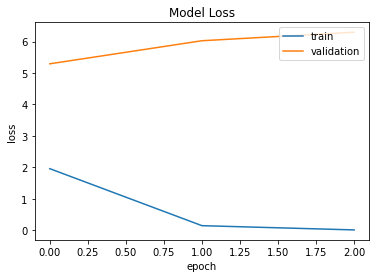

In [37]:
import matplotlib.pyplot as plt

plt.plot(log['train_loss'])
plt.plot(log['dev_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.show()

In [ ]:
#source = [list("abcdefghijkl"), list("mnopqrstwxyz")]
#target = [list("ABCDEFGHIJKL"), list("MNOPQRSTWXYZ")] #update to astronomy vocab
source = []yy
for s in model.source_index:
    sentence = ""
    for c in s:
        #nu = source_index[c]
        #sentence.append(c)
        #sentence.append(num)
        sentence += c
    source.append(sentence)

In [ ]:
import os
from tqdm.notebook import tqdm
from pathlib import Path
import pandas as pd
from nltk.lm import Vocabulary
import pickle
import sys
import torch
import importlib
from timeit import default_timer as t
sys.path.append("../../lib")
#from metrics import levenshtein
import post_ocr_correction
from pytorch_beam_search import seq2seq

In [ ]:
import torch

model = Transformer(char2i, 
                    i2char, 
                    max_sequence_length = 110,
                    embedding_dimension = 256,
                    feedforward_dimension = 1024,
                    attention_heads = 8,
                    encoder_layers = 2,
                    decoder_layers = 2,
                   dropout = .5)

model.load_state_dict(torch.load("./new_torch_file60_7.pt", map_location=torch.device('cpu')))
#model = torch.load("../../data/torch_file60.pt", map_location=torch.device('cpu'))

In [ ]:
test_data = pd.read_csv('./source_dataframe.csv')
print(test_data)

In [ ]:
import pandas as pd
!pip install Levenshtein
from Levenshtein import distance
import re
from tqdm.auto import tqdm
       
def levenshtein(reference, hypothesis, progress_bar = False):
    #assert len(reference) == len(hypothesis)
    text = zip(reference, hypothesis)
    if progress_bar:
        text = tqdm(text, total = len(reference))
    d = [distance(r, h) for r, h in text]
    output = pd.DataFrame({"reference":reference, "hypothesis":hypothesis})\
    .assign(distance = lambda df: d)\
    .assign(
        cer = lambda df: df.apply(
            lambda r: 100 * r["distance"] / max(len(r["reference"]), 1), 
            axis = 1
        )
    )
    return output

In [ ]:
#arr = test_data["ocr_to_input"].to_numpy()
# gs_arr = test_data["gs_aligned"].to_numpy()
ocr_list = test_data["ocr_aligned"].tolist()
gs_list = test_data["gs_aligned"].tolist()

In [ ]:
from math import exp

def uniform(j, window_size):
    return 1.0

def triangle(j, window_size):
    m = window_size//2
    return m - 0.5 * abs(m - j)

def bell(j, window_size):
    m = window_size // 2
    s = window_size // 2
    return exp(-((m-j)/s)**2)

def disjoint(
    string,
    model, 
    source_index,
    target_index,
    window_size = 50,
    decoding_method = "greedy_search", 
    document_progress_bar = False, 
    document_batch_progress_bar = 0, 
    *arcorrect
):
    model.eval()
    windows = [string[i:i+window_size] 
        for i in range(0, len(string), window_size)]
    windows = ["".join([source_index.vocabulary.lookup(c) for c in s])\
        .replace("<UNK>", " ") for s in windows]
    X = source_index.text2tensor(windows, progress_bar = False).cuda()
    if decoding_method == "greedy_search":
        predictions, probs = seq2seq.greedy_search(
            model,
            X, 
            predictions = window_size, 
            progress_bar = document_batch_progress_bar, 
            *arcorrect
        )
    elif decoding_method == "beam_search":
        predictions, probs = seq2seq.beam_search(
            model,
            X, 
            predictions = window_size, 
            progress_bar = document_batch_progress_bar, 
            *arcorrect
        )   
        predictions = predictions[:, 0, :]
    output = target_index.tensor2text(predictions)
    output = [re.sub(r"<START>|<PAD>|<UNK>|<END>.*", "", s) for s in output]
    return "".join(output)

def n_grams(
    string,
    model,
    source_index,
    target_index,
    window_size = 50, 
    decoding_method = "greedy_search", 
    weighting = "uniform",
    document_progress_bar = False, 
    document_batch_progress_bar = 0,      
    main_batch_size = 1024,
    *arcorrect
):
    model.eval()
    if len(string) <= window_size:
        windows = [string]
    else:
        windows = [string[i:i + window_size] 
            for i in range(len(string) - window_size + 1)]
    windows = ["".join([source_index.vocabulary.lookup(c) for c in s])\
    .replace("<UNK>", " ") for s in windows]
    X = source_index.text2tensor(windows, progress_bar = False).cuda()
    if decoding_method == "greedy_search":
        predictions, probs = seq2seq.greedy_search(
            model,
            X, 
            predictions = window_size, 
            progress_bar = False, 
            *arcorrect
        )
    if decoding_method == "beam_search":
        predictions, probs = seq2seq.beam_search(
            model,
            X, 
            predictions = window_size, 
            progress_bar = document_batch_progress_bar, 
            *arcorrect
        )   
        predictions = predictions[:, 0, :]   
    output = target_index.tensor2text(predictions)
    output = [re.sub(r"<START>|<PAD>|<UNK>|<END>.*", "", s) for s in output]
    if weighting == "uniform":
        weighting = uniform
    elif weighting == "triangle":
        weighting = triangle
    elif weighting == "bell":
        weighting = bell
    votes = [
        {k:0.0 for k in target_index.vocabulary} 
        for c in string
    ]
    for i, s in enumerate(output):
        for j, (counter, char)\
        in enumerate(zip(votes[i:i + window_size], s)):
            counter[char] += weighting(j, window_size)
    output = [max(c.keys(), key = lambda x: c[x]) for c in votes]
    output = "".join(output)
    return votes, output


In [ ]:
new_source = []
n = 20 # chunk length  
#for s in arr:
for x in range(48):#only process n paragraphs?
    s = ocr_list[x]
    #sentence_array = list(s) #convert string to an array of characters
    chunks = [s[i:i+n] for i in range(0, len(s), n)]
    for sentence_chunk in chunks:
        new_source.append(list(sentence_chunk))#append array to new_source array

    #new_source.append(list("stars cataclysmic  "))#mark end of sentences with stars cataclysmic
    new_source.append( list("advice charm touch  "))#new end of sentence with 20 chars
    #because the model only allows 20 characters at a time, each row is 20 chars chunks

In [ ]:
#new_source

In [ ]:
from pytorch_beam_search import seq2seq
source_index = seq2seq.Index(source)
target_index =  source_index
X_new = source_index.text2tensor(new_source)

In [ ]:
predictions, log_probabilities = beam_search(
    model,
    X_new.cuda())

In [ ]:
predictions.cuda()

In [ ]:
output = [target_index.tensor2text(p) for p in predictions]

In [ ]:
#output
#output2 = [source_index.tensor2text(p) for p in predictions]

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
predictions.to(device)

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
predictions.to(device)
device
torch.cuda.get_device_name(0)

In [ ]:
from math import exp

def uniform(j, window_size):
    return 1.0

def triangle(j, window_size):
    m = window_size//2
    return m - 0.5 * abs(m - j)

def bell(j, window_size):
    m = window_size // 2
    s = window_size // 2
    return exp(-((m-j)/s)**2)

def disjoint(
    string,
    model, 
    source_index,
    target_index,
    window_size = 50,
    decoding_method = "greedy_search", 
    document_progress_bar = False, 
    document_batch_progress_bar = 0, 
    *arcorrect
):
    model.eval()
    windows = [string[i:i+window_size] 
        for i in range(0, len(string), window_size)]
    windows = ["".join([source_index.vocabulary.lookup(c) for c in s])\
        .replace("<UNK>", " ") for s in windows]
    X = source_index.text2tensor(windows, progress_bar = False).cuda()
    if decoding_method == "greedy_search":
        predictions, probs = seq2seq.greedy_search(
            model,
            X, 
            predictions = window_size, 
            progress_bar = document_batch_progress_bar, 
            *arcorrect
        )
    elif decoding_method == "beam_search":
        predictions, probs = seq2seq.beam_search(
            model,
            X, 
            predictions = window_size, 
            progress_bar = document_batch_progress_bar, 
            *arcorrect
        )   
        predictions = predictions[:, 0, :]
    output = target_index.tensor2text(predictions)
    output = [re.sub(r"<START>|<PAD>|<UNK>|<END>.*", "", s) for s in output]
    return "".join(output)

def n_grams(
    string,
    model,
    source_index,
    target_index,
    window_size = 50, 
    decoding_method = "greedy_search", 
    weighting = "uniform",
    document_progress_bar = False, 
    document_batch_progress_bar = 0,      
    main_batch_size = 1024,
    *arcorrect
):
    model.eval()
    if len(string) <= window_size:
        windows = [string]
    else:
        windows = [string[i:i + window_size] 
            for i in range(len(string) - window_size + 1)]
    windows = ["".join([source_index.vocabulary.lookup(c) for c in s])\
    .replace("<UNK>", " ") for s in windows]
    X = source_index.text2tensor(windows, progress_bar = False).cuda()
    if decoding_method == "greedy_search":
        predictions, probs = seq2seq.greedy_search(
            model,
            X, 
            predictions = window_size, 
            progress_bar = False, 
            *arcorrect
        )
    if decoding_method == "beam_search":
        predictions, probs = seq2seq.beam_search(
            model,
            X, 
            predictions = window_size, 
            progress_bar = document_batch_progress_bar, 
            *arcorrect
        )   
        predictions = predictions[:, 0, :]   
    output = target_index.tensor2text(predictions)
    output = [re.sub(r"<START>|<PAD>|<UNK>|<END>.*", "", s) for s in output]
    if weighting == "uniform":
        weighting = uniform
    elif weighting == "triangle":
        weighting = triangle
    elif weighting == "bell":
        weighting = bell
    votes = [
        {k:0.0 for k in target_index.vocabulary} 
        for c in string
    ]
    for i, s in enumerate(output):
        for j, (counter, char)\
        in enumerate(zip(votes[i:i + window_size], s)):
            counter[char] += weighting(j, window_size)
    output = [max(c.keys(), key = lambda x: c[x]) for c in votes]
    output = "".join(output)
    return votes, output


In [ ]:
def full_evaluation(
    raw, 
    gs, 
    model, 
    source_index,
    target_index,
    save_path = None, 
    window_size = 40, 
    document_progress_bar = False
):
    print("evaluating all methods...")
    metrics = []
    old = levenshtein(reference = gs, hypothesis = raw).cer.mean()
    # disjoint
    print("  disjoint window...")
    print("    greedy_search...")
    start = t()
    corrections = [
        disjoint(
            s, 
            model, 
            source_index,
            target_index,
            document_progress_bar = document_progress_bar, 
            window_size = window_size
        ) for s in raw]
    print("hello")
    metrics.append(
        {
            "window":"disjoint", 
            "decoding":"greedy",
            "window_size":window_size * 2,
            "weighting":pd.NA,
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)
    start = t()
    corrections = [
        disjoint(
            s, 
            model, 
            source_index,
            target_index,
            document_progress_bar = document_progress_bar, 
            window_size = window_size * 2
        ) 
        for s in raw
    ]
    metrics.append(
        {
            "window":"disjoint", 
            "decoding":"greedy",
            "window_size":window_size,
            "weighting":pd.NA,
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)
    print("    beam_search...")
    start = t()
    corrections = [
        disjoint(
            s, 
            model, 
            source_index,
            target_index,
            decoding_method = "beam_search", 
            document_progress_bar = document_progress_bar, 
            window_size = window_size
        ) 
        for s in raw
    ]
    metrics.append(
        {
            "window":"disjoint", 
            "decoding":"beam", 
            "window_size":window_size * 2,
            "weighting":pd.NA,
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)
    start = t()
    corrections = [
        disjoint(
            s, 
            model, 
            source_index,
            target_index,
            decoding_method = "beam_search", 
            document_progress_bar = document_progress_bar, 
            window_size = window_size * 2
        ) 
        for s in raw
    ]
    metrics.append(
        {
            "window":"disjoint", 
            "decoding":"beam", 
            "window_size":window_size,
            "weighting":pd.NA,
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)
    # sliding
    print("  sliding")
    print("    greedy...")
    ## greedy search
    print("      uniform...")
    start = t()
    corrections = [
        n_grams(
            s, 
            model, 
            source_index,
            target_index,
            weighting = uniform,
            document_progress_bar = document_progress_bar,
            window_size = window_size
        )[1] 
        for s in raw
    ]
    metrics.append(
        {
            "window":"sliding", 
            "decoding":"greedy", 
            "window_size":window_size,
            "weighting":"uniform",
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)

    print("      triangle...")
    start = t()
    corrections = [
        n_grams(
            s, 
            model, 
            source_index,
            target_index,
            weighting = triangle, 
            document_progress_bar = document_progress_bar,
            window_size = window_size
        )[1] 
        for s in raw
    ]
    metrics.append(
        {
            "window":"sliding", 
            "decoding":"greedy", 
            "window_size":window_size,
            "weighting":"triangle",
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)

    print("      bell...")
    start = t()
    corrections = [
        n_grams(
            s, 
            model, 
            source_index,
            target_index,
            weighting = bell, 
            document_progress_bar = document_progress_bar,
            window_size = window_size
        )[1] 
        for s in raw
    ]
    metrics.append(
        {
            "window":"sliding", 
            "decoding":"greedy", 
            "window_size":window_size,
            "weighting":"bell",
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)

    ## beam search
    print("    beam...")
    print("      uniform...")
    start = t()
    corrections = [
        n_grams(
            s, 
            model, 
            source_index,
            target_index,
            decoding_method = "beam_search", 
            weighting = uniform, 
            document_progress_bar = document_progress_bar,
            window_size = window_size
        )[1] 
        for s in raw
    ]
    metrics.append(
        {
            "window":"sliding", 
            "decoding":"beam", 
            "window_size":window_size,
            "weighting":"uniform",
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)

    print("      triangle...")
    start = t()
    corrections = [
        n_grams(
            s, 
            model, 
            source_index,
            target_index,
            decoding_method = "beam_search", 
            weighting = triangle, 
            document_progress_bar = document_progress_bar,
            window_size = window_size
        )[1] 
        for s in raw
    ]
    metrics.append(
        {
            "window":"sliding", 
            "decoding":"beam", 
            "window_size":window_size,
            "weighting":"triangle",
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)

    print("      bell...")
    start = t()
    corrections = [
        n_grams(
            s, 
            model.cuda(), 
            source_index,
            target_index,
            decoding_method = "beam_search", 
            weighting = bell, 
            document_progress_bar = document_progress_bar,
            window_size = window_size
        )[1] 
        for s in raw
    ]
    metrics.append(
        {
            "window":"sliding", 
            "decoding":"beam", 
            "window_size":window_size,
            "weighting":"bell",
            "inference_seconds":t() - start,
            "cer_before":old,
            "cer_after":levenshtein(gs, corrections).cer.mean()
        }
    )
    if save_path:
        pd.DataFrame(metrics).assign(
            improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
        ).to_csv(save_path, index = False)
    print()
    return pd.DataFrame(metrics).assign(
        improvement = lambda df: 100 * (1 - df.cer_after / df.cer_before)
    )

In [ ]:
#evaluation

In [ ]:
print("\nevaluating all correction methods...")
evaluation = full_evaluation(
    ocr_list,
    gs_list,
    model,
    source_index,
    target_index,
)

print("\n--results--")
print("test data:", test)
print("plain beam search:", just_beam)
print("disjoint")
print("  greedy search:", disjoint_greedy)
print("  beam search:", disjoint_beam)
print("n_grams")
print("  greedy search:", n_grams_greedy)
print("  beam search:", n_grams_beam)

print("\n", evaluation)

In [ ]:
gs_list #take out @

In [ ]:
evaluation

In [ ]:
uniform

In [ ]:
evaluation.to_csv("evaluation60new.csv")

In [ ]:
new_output = []
sentence = ""
for chunks in output:
    #if chunks[0] == 'stars cataclysmic  ':#everytime it finds stars cataclysmic it outputs a new sentence #theres only 19?
    if chunks[0] == '<START>advice charm touch  ':#everytime it finds advice charm touch   it outputs a new sentence
        new_output.append(sentence)
        sentence = ""# this empties the sentence variable whenever a sentence is added to the array
    else:
       new_sentence = chunks[0].replace("<START>", "")
       new_sentence = new_sentence.replace("<END>", "")
       sentence = sentence + new_sentence #combining the chunks of 20 characters together without the start and end
        

In [ ]:
#new_output

In [ ]:
import numpy as np
import pandas as pd
unnamed = list(range(1,49))
#print(unnamed)
test_data['new_output'] = new_output
test_data['unnamed'] = unnamed

In [ ]:
#test_data
#test_data.to_csv('./github_output_df.csv')

In [ ]:
!pip install pybind11
!pip install fastwer
#!pip install pytesseract
#!sudo apt install tesseract-ocr

import cv2
#import pytesseract
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [ ]:
for index, row in test_data.iterrows():
  filename = row['unnamed']
  ref = row['gs_aligned']
  ocr = row['ocr_aligned']
  output = row['new_output']
  cer = fastwer.score_sent(ocr, ref, char_level=True)
  wer = fastwer.score_sent(ocr, ref, char_level=False)
  test_data.loc[test_data['unnamed'] == filename, 'before_cer'] = round(cer,2) # Round value to 2 decimal places
  test_data.loc[test_data['unnamed'] == filename, 'before_wer'] = round(wer,2)

#test_data

In [ ]:
test_data.to_csv('./cer_wer_new50.csv')

In [ ]:
for index, row in test_data.iterrows():
  filename = row['unnamed']
  ref = row['gs_aligned']
  ocr = row['ocr_aligned']
  output = row['new_output']
  cer = fastwer.score_sent(output, ref, char_level=True)
  wer = fastwer.score_sent(output, ref, char_level=False)
  test_data.loc[test_data['unnamed'] == filename, 'after_cer'] = round(cer,2) # Round value to 2 decimal places
  test_data.loc[test_data['unnamed'] == filename, 'after_wer'] = round(wer,2)

#test_data

In [ ]:
test_data.to_csv('./cer_wer_new50epochs.csv')

In [ ]:
#test_data

In [ ]:
#output

In [ ]:
sentence

In [ ]:
from nltk import tokenize
new_output = tokenize.sent_tokenize(sentence)
#new_output

In [ ]:
gs =test_data['gs_aligned']
gs_list = ' '.join(test_data['gs_aligned'].tolist())
#gs_array = gs.to_numpy()

#print(gs_array)
new_gs = tokenize.sent_tokenize(gs_list) # trying to take gs column to match the length of the new_output.
len(new_gs)

In [ ]:
def readTest():   
    input_file = './post_ocr_correction/data/en/data/test'
    
    # reverse is true, therefore pair[0] is ocr and pair[1] is gs
    input_lang, output_lang, pairs = prepareData(input_file,'gs', 'ocr', True)
    
    output_sentences = []
    input_sentences = []
    corrected_sentences = []
    for pair in pairs:
        sentence = pair[0]  #ocr sentence
        try:
            output_words, attentions = evaluate(encoder1, attn_decoder1, sentence)
            input_sentences.append(pair[1])  #gs sentence
            output_sentences.append(pair[0]) #ocr sentence
            corrected_sentences.append(' '.join(output_words))
 
            #testing_df.append({'output':''.join(output_words),'input':x},ignore_index=True)
            #showAttention(x, output_words, attentions)
        except KeyError:
            print('KeyError =', sentence)
    testing_df = pd.DataFrame({"gs":input_sentences, "ocr":output_sentences, "output":corrected_sentences})
    return testing_df
testing_dataframe1 = readTest()
testing_dataframe1

In [ ]:
import pandas as pd
output_df1 = pd.DataFrame({"output":new_output})
output_df1.to_csv('./output_dataframe_new.csv')

In [ ]:
output_df1

In [ ]:
def readTest():   
    input_file = './post_ocr_correction/data/en/data/test'
    
    # reverse is true, therefore pair[0] is ocr and pair[1] is gs
    input_lang, output_lang, pairs = prepareData(input_file,'gs', 'ocr', True)
    
    output_sentences = []
    input_sentences = []
    corrected_sentences = []
    for pair in pairs:
        sentence = pair[0]  #ocr sentence
        try:
            output_words, attentions = evaluate(encoder1, attn_decoder1, sentence)
            input_sentences.append(pair[1])  #gs sentence
            output_sentences.append(pair[0]) #ocr sentence
            corrected_sentences.append(' '.join(output_words))
 
            #testing_df.append({'output':''.join(output_words),'input':x},ignore_index=True)
            #showAttention(x, output_words, attentions)
        except KeyError:
            print('KeyError =', sentence)
    testing_df = pd.DataFrame({"gs":input_sentences, "ocr":output_sentences, "output":corrected_sentences})
    return testing_df
testing_dataframe1 = readTest()
testing_dataframe1

In [ ]:
# import pandas as pd
# #dictionary = {'GS': "", 'OCR': "", 'index'=[0]} 
# #training_df = pd.DataFrame(dictionary)

# ocr =[]
# ocr_aligned=[]
# gs_aligned=[]

# for x in range(1008,1120):
#     for y in range(len(PDF_OUT_SENT[x])):
#         for z in range(len(PDF_OUT_SENT[x][y])):
#             OCR = OCR_OUT_SENT[x][y][z]
#             OCR_aligned_train = OCR_aligned_SENT[x][y][z]
#             GS_aligned_train = PDF_OUT_SENT[x][y][z]
#             #dictionary = {'GS': GS_train, 'OCR': OCR_train} 
#             #training_df = pd.DataFrame(dictionary)
#             #gs_train = training_df.append(OCR_OUT_SENT)
#             ocr.append(OCR)
#             ocr_aligned.append(OCR_aligned_train)
#             gs_aligned.append(GS_aligned_train)
#             #training_df = pd.concat([training_df, pd.DataFrame(dictionary)], ignore_index = True)
# data_ocr = pd.DataFrame({"ocr_to_input":ocr}) #"ocr_aligned":ocr_aligned, "gs_aligned":gs_aligned})
# print(data_ocr.shape)
# data_ocr

In [ ]:
idx, probs = model.predict(dev_source)

In [ ]:
model.tensor2text(idx)

In [ ]:
model.tensor2text(train_target[:10])

In [ ]:
model.tensor2text(train_source[:10])